Let's do some five paralell line detection!

In [2]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math


True

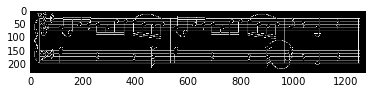

In [3]:
# img = cv2.imread('../images/music1.png')
# plt.imshow(img)
# #plt.imshow(img,cmap = 'gray')
# edges = cv2.Canny(img,100,200)/255
# plt.imshow(edges,cmap = 'gray')
# cv2.imwrite("../images/music1_edge.png",edges*255)

In [22]:
f='../images/sobel_binary.png'
img = cv2.imread(f)
edges_temp=img/255
edges=edges_temp.transpose(2, 0, 1)[0]
edges.shape

(231, 1274)

In [18]:
def draw_detected(img,k,s):
    width=len(img[0])
    cv2.line(img, (0, k), (width, k), (0, 0, 255)) 
    for i in [1,2]:
        cv2.line(img, ( m0, k+i*s), (width, k+i*s), (0, 0, 255))
        cv2.line(img, (0, k-i*s), (width, k-i*s), (0, 0, 255)) 
    return img

In [12]:
def draw_lines(k,s,img,f):
    n_img=draw_detected(img,k,s)
    cv2.imwrite(f,n_img)

In [23]:
vote=np.zeros([len(edges),50])
for y in xrange(len(edges)):
    print y,
    for x in xrange(len(edges[0])):
        if edges[y][x]==1:#if thie pixel is edge point
            try:
                #way 1 : standard
                for s in xrange(5,50):
                    k_set=[y-2*s,y-s,y,y+s,y+2*s]
                    for k in k_set:
                        vote[k][s]+=1    

                #way 1 : standard + cheating 
#                 for s in xrange(5,20):
#                     k_set=[y-2*s,y-s,y,y+s,y+2*s]
#                     for k in k_set:
#                         vote[k][s]+=1      
                        
                #way2:five exact fararell points. Maybe too strong
#                 for s in xrange(5,50):
#                     if edges[y-2*s][x]*edges[y-s][x]*edges[y+s][x]*edges[y+2*s][x]==1 and\
#                     edges[y-1][x]==0 and edges[y+1][x]==0:
#                         vote[y][s]+=1

                #way3 continuous_line_check, but does not prevent issue of 22. 
#                 continuous_line_check=1
#                 for i in xrange(1,10):
#                     continuous_line_check*=edges[y][x-i]*edges[y][x+i]
#                 if continuous_line_check==1:
#                     for s in xrange(5,50):
#                         k_set=[y-2*s,y-s,y,y+s,y+2*s]
#                         for k in k_set:
#                             vote[k][s]+=1

                #way4 :why this work?
#                 for s in xrange(5,50):
#                     k_set=[y-2*s,y-s,y,y+s,y+2*s]
#                     for k in k_set:
#                         if edges[k-1][x]*edges[k+1][x]==1:
#                             vote[k][s]+=1
            except(IndexError):
                pass
                    

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230


In [27]:
top_points=vote.argsort(axis=None)[::-1][0:10]
for (rank,point) in enumerate(top_points):
    index=np.unravel_index(point, vote.shape)
    k=index[0]
    s=index[1]
    img = cv2.imread(f)
    n_img=draw_detected(img,k,s)
    cv2.imwrite(f+"_lines%d_%d.png"%(rank,i),n_img)

(174, 12) 4851.0
(174, 11) 4837.0
(53, 12) 4787.0
(53, 11) 4583.0
(65, 12) 3964.0
(75, 23) 3901.0
(52, 23) 3867.0
(175, 6) 3817.0
(64, 12) 3814.0
(52, 6) 3792.0
(66, 12) 3786.0
(173, 6) 3776.0
(125, 25) 3746.0
(41, 12) 3741.0
(54, 6) 3739.0
(64, 11) 3737.0
(97, 33) 3729.0
(162, 12) 3725.0
(163, 12) 3725.0
(163, 11) 3709.0


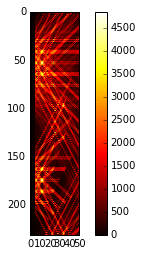

In [26]:
plt.imshow(vote, cmap=plt.cm.hot)
plt.colorbar()
#plt.savefig("graph.pdf")

top_points=vote.argsort(axis=None)[::-1][0:20]
for i in top_points:
    index=np.unravel_index(i, vote.shape)
    print np.unravel_index(i, vote.shape),vote[index[0]][index[1]]

In [30]:
top_points=vote.argsort(axis=None)[::-1]
for i in top_points:
    index=np.unravel_index(i, vote.shape)
    print np.unravel_index(i, vote.shape),vote[index[0]][index[1]]

(174, 12) 4851.0
(174, 11) 4837.0
(53, 12) 4787.0
(53, 11) 4583.0
(65, 12) 3964.0
(75, 23) 3901.0
(52, 23) 3867.0
(175, 6) 3817.0
(64, 12) 3814.0
(52, 6) 3792.0
(66, 12) 3786.0
(173, 6) 3776.0
(125, 25) 3746.0
(41, 12) 3741.0
(54, 6) 3739.0
(64, 11) 3737.0
(97, 33) 3729.0
(162, 12) 3725.0
(163, 12) 3725.0
(163, 11) 3709.0
(52, 11) 3703.0
(164, 11) 3702.0
(162, 11) 3692.0
(175, 11) 3690.0
(173, 11) 3689.0
(41, 11) 3688.0
(42, 12) 3679.0
(42, 11) 3678.0
(54, 12) 3674.0
(185, 11) 3674.0
(175, 12) 3673.0
(186, 12) 3654.0
(173, 12) 3645.0
(43, 11) 3639.0
(161, 12) 3636.0
(184, 11) 3631.0
(186, 11) 3625.0
(187, 12) 3596.0
(185, 12) 3580.0
(65, 11) 3579.0
(63, 11) 3553.0
(102, 25) 3542.0
(40, 12) 3511.0
(52, 12) 3506.0
(224, 36) 3494.0
(29, 23) 3484.0
(54, 11) 3464.0
(77, 23) 3397.0
(54, 23) 3369.0
(229, 33) 3287.0
(59, 16) 3271.0
(31, 23) 3231.0
(63, 14) 3199.0
(77, 6) 3184.0
(77, 7) 3183.0
(36, 7) 3116.0
(49, 14) 3093.0
(71, 6) 3090.0
(41, 6) 3080.0
(68, 14) 3072.0
(63, 17) 3061.0
(29, 7) 3

In [21]:
#行列を半分に
k_div=3
s_div=3
vote_descrete=np.zeros([int(len(edges)/k_div),int(50/s_div)])
for l in xrange(len(vote_descrete)):
    for m in xrange(len(vote_descrete[0])):
        for plus_k in xrange(k_div):
            for plus_s in xrange(s_div):
                desc_k=k_div*l+plus_k
                desc_s=s_div*m+plus_s
                try:
                    if(vote[desc_k][desc_s]):
                        vote_descrete[l][m]+=vote[desc_k][desc_s]
                except(IndexError):
                    pass;


top_points=vote_descrete.argsort(axis=None)[::-1][0:10]
for i in top_points:
    index=np.unravel_index(i, vote_descrete.shape)
    k=np.unravel_index(i, vote_descrete.shape)[0]*k_div+k_div/7
    s=np.unravel_index(i, vote_descrete.shape)[1]*s_div+s_div/2
    print (k,s),vote_descrete[index[0]][index[1]]

(63, 10) 25682.0
(63, 13) 25172.0
(162, 10) 24705.0
(51, 10) 24300.0
(51, 13) 24011.0
(174, 10) 23903.0
(174, 13) 22970.0
(63, 22) 22930.0
(42, 10) 22385.0
(57, 7) 22327.0


In [135]:
img = cv2.imread('../images/music1.png')
n_img=draw_detected(img,174,11)
f='../images/music1_detected0.png'
cv2.imwrite(f,n_img)

img = cv2.imread('../images/music1.png')
n_img=draw_detected(img,125,25)
f='../images/music1_detected1.png'
cv2.imwrite(f,n_img)

img = cv2.imread('../images/music1.png')
n_img=draw_detected(img,53,12)
f='../images/music1_detected3.png'
cv2.imwrite(f,n_img)

True

In [ ]:
img = cv2.imread('../images/music3.png')
n_img=draw_detected(img,53,12)
f='../images/music3_horizontal_check.png'
cv2.imwrite(f,n_img)

<h1>This is not good..
Let's test with trivial case.</h1>

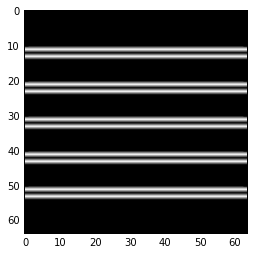

In [229]:
img = cv2.imread('../images/test_lines.png')
plt.imshow(img)
edges = cv2.Canny(img,100,200)/255
plt.imshow(edges,cmap = 'gray')
#cv2.imwrite("../images/music1_edge.png",edges*255)

In [233]:
for y in xrange(len(edges)):
    print y,
    for x in xrange(len(edges[0])):
        edge_point=edges[y][x]
        if edge_point==1:#if thie pixel is edge point
            try:
                for s in xrange(5,50):
                    k_set=[y-2*s,y-s,y,y+s,y+2*s]
                    if edges[y-2*s][x]*edges[y-s][x]*edges[y+2*s][x]*edges[y+2*s][x]==1:
                        vote[y][s]+=1
            except(IndexError):
                pass
                    

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63


(33, 10) 192.0
(31, 10) 192.0
(43, 10) 128.0
(53, 10) 128.0
(51, 10) 128.0
(21, 10) 128.0
(13, 10) 128.0
(11, 10) 128.0
(41, 10) 128.0
(23, 10) 128.0
(199, 49) 0.0
(66, 35) 0.0
(66, 37) 0.0
(66, 36) 0.0
(66, 34) 0.0
(66, 39) 0.0
(66, 33) 0.0
(66, 32) 0.0
(66, 31) 0.0
(66, 30) 0.0


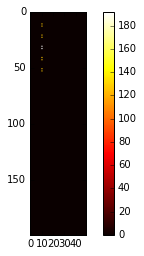

In [235]:
plt.imshow(vote, cmap=plt.cm.hot)
plt.colorbar()

top_points=vote.argsort(axis=None)[::-1][0:20]
for i in top_points:
    index=np.unravel_index(i, vote.shape)
    print np.unravel_index(i, vote.shape),vote[index[0]][index[1]]

(31, 10) 320.0
(33, 10) 320.0
(21, 10) 256.0
(23, 10) 256.0
(41, 10) 256.0
(43, 10) 256.0
(53, 10) 192.0
(51, 10) 192.0
(13, 10) 192.0
(43, 5) 192.0
(23, 5) 192.0
(11, 20) 192.0
(51, 20) 192.0
(31, 5) 192.0
(21, 5) 192.0
(41, 5) 192.0
(33, 5) 192.0
(13, 20) 192.0
(53, 20) 192.0
(31, 20) 192.0


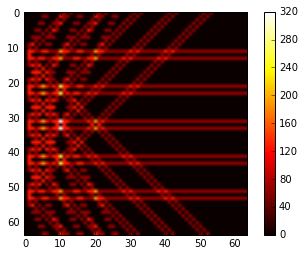

In [81]:
vote=np.zeros([64,64])
for y in xrange(len(edges)):
    for x in xrange(len(edges[0])):
        edge_point=edges[y][x]
        if edge_point !=0:#if thie pixel is edge point
            for s in xrange(1,64):#cannot start from s=0 because it will be the same line
                k_set=[y-2*s,y-s,y,y+s,y+2*s]
                for k in k_set:
                    if k in xrange(0,64):
                        vote[k][s]+=1
                        
plt.imshow(vote, cmap=plt.cm.hot)
plt.colorbar()

top_points=vote.argsort(axis=None)[::-1][0:20]
for i in top_points:
    index=np.unravel_index(i, vote.shape)
    print np.unravel_index(i, vote.shape),vote[index[0]][index[1]]

(31, 10) 64.0
(33, 10) 64.0
(63, 63) 0.0
(21, 20) 0.0
(21, 16) 0.0
(21, 17) 0.0
(21, 18) 0.0
(21, 19) 0.0
(21, 21) 0.0
(21, 14) 0.0
(21, 22) 0.0
(21, 23) 0.0
(21, 24) 0.0
(21, 25) 0.0
(21, 26) 0.0
(21, 27) 0.0
(21, 15) 0.0
(21, 13) 0.0
(21, 29) 0.0
(21, 12) 0.0


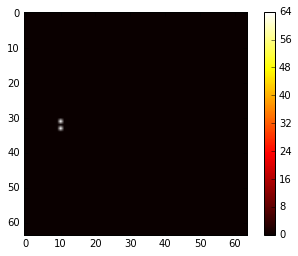

In [84]:
#five pararell points at the same time
vote=np.zeros([64,64])
for y in xrange(len(edges)):
    for x in xrange(len(edges[0])):
        edge_point=edges[y][x]
        if edge_point !=0:#if thie pixel is edge point
            for s in xrange(1,64):#cannot start from s=0 because it will be the same line
                flag=1
                try:
                    if edges[y-2*s][x]*edges[y-s][x]*edges[y+2*s][x]*edges[y+2*s][x]==1:
                        vote[y][s]+=1
                except(IndexError):
                    pass
                                                
plt.imshow(vote, cmap=plt.cm.hot)
plt.colorbar()

top_points=vote.argsort(axis=None)[::-1][0:20]
for i in top_points:
    index=np.unravel_index(i, vote.shape)
    print np.unravel_index(i, vote.shape),vote[index[0]][index[1]]
    

In [76]:
True*True

1

In [40]:
#行列を半分に
vote_descrete=np.zeros([int(64/3),int(64/3)])
for l in xrange(len(vote_descrete)):
    for m in xrange(len(vote_descrete[0])):
        vote_descrete[l][m]=vote[3*l][3*m]+vote[3*l+1][3*m+1]+vote[3*l+2][3*m+2]

top_points=vote_descrete.argsort(axis=None)[::-1][0:10]
for i in top_points:
    index=np.unravel_index(i, vote_descrete.shape)
    k=np.unravel_index(i, vote_descrete.shape)[0]*3+1
    s=np.unravel_index(i, vote_descrete.shape)[1]*3+1
    print (k,s),vote_descrete[index[0]][index[1]]

(31, 10) 512.0
(43, 10) 448.0
(52, 19) 384.0
(37, 4) 320.0
(34, 7) 320.0
(52, 31) 320.0
(40, 7) 320.0
(25, 4) 320.0
(28, 7) 320.0
(37, 16) 320.0


In [64]:
n_img=draw_detected(img,31,10)
f='../images/test_lines_detected.png'
cv2.imwrite(f,n_img)

True

Do it again for musics

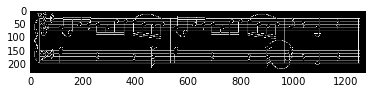

In [128]:
img = cv2.imread('../images/music1.png')
edges = cv2.Canny(img,100,200)
plt.imshow(edges,cmap = 'gray')

 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 
(70, 5) 35.0
(71, 5) 35.0
(69, 5) 35.0
(75, 8) 33.0
(62, 5) 33.0
(73, 5) 33.0
(72, 5) 32.0
(67, 5) 31.0
(68, 5) 31.0
(64, 5) 30.0
(69, 6) 30.0
(64, 6) 30.0
(71, 6) 30.0
(66, 7) 30.0
(6

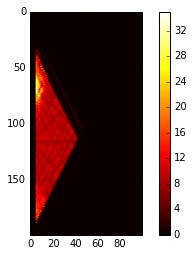

In [131]:
vote=np.zeros([200,100])
for y in xrange(len(edges)):
    print y,
    for x in xrange(len(edges[0])):
        edge_point=edges[y][x]
        if edge_point !=0:#if thie pixel is edge point
            for s in xrange(5,100):#cannot start from s=0 because it will be the same line
                k_set=[y-2*s,y-s,y,y+s,y+2*s]
                flag=0
                for k in k_set:
                    if k in xrange(0,200):
                        if edges[k][x]>0:
                            flag+=1 #if line exists on  
                if flag>=5:
                    vote[y][s]+=1
                    
plt.imshow(vote, cmap=plt.cm.hot)
plt.colorbar()

print ""

top_points=vote.argsort(axis=None)[::-1][0:20]
for i in top_points:
    index=np.unravel_index(i, vote.shape)
    print np.unravel_index(i, vote.shape),vote[index[0]][index[1]]

In [ ]:
n_img=draw_detected(img,69,10)
f='../images/music1_detected1_.png'
cv2.imwrite(f,n_img)